In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "F:\All data\Patient_Signal\PPG.csv"
data = pd.read_csv(file_path, header=None)

data.columns = ['Name', 'i', 'Bad', 'hands', 'label', 'systolic peak', 'Diastolic peak', 'Cardiac cycle', 'Cycle Area', 'SSI', 'Peak to Valley', 'Systolic peak y', '1st Derivative cycle', '1st Derivative peak']
# Display the first few rows of the dataframe to understand its structure
data.head()

,Name,i,Bad,hands,label,systolic peak,Diastolic peak,Cardiac cycle,Cycle Area,SSI,Peak to Valley,Systolic peak y,1st Derivative cycle,1st Derivative peak
0,伍黃秀霞,1 th,Right,Left,1,1278.0,0.390019,993.0,315.004855,987.0,720.0,0.516570,1000.0,0.447513
1,伍黃秀霞,1 th,Right,Right,1,1265.0,0.275706,977.0,267.261331,995.0,714.0,0.485722,994.0,0.327676
2,伍黃秀霞,3 th,Right,Left,1,1280.0,0.344179,997.0,307.701319,1011.0,718.0,0.468073,994.0,0.427002
3,伍黃秀霞,3 th,Right,Right,1,1278.0,0.350065,979.0,286.925793,1011.0,705.0,0.506998,1005.0,0.343972
4,伍黃秀霞,5 th,Right,Left,1,1296.0,0.354134,1000.0,318.004937,1009.0,701.0,0.428415,996.0,0.360314


In [75]:
# 分離出標籤與特徵（將前三列資訊保留在特徵DataFrame中以便保留索引）
info_columns = data.iloc[:, :4]  # 前三列資訊
X = data.iloc[:, 5:]             # 特徵（從第5列開始）
y = data.iloc[:, 4]              # 標籤（第4列）
#印出x的標題
print(X.columns[0])

# 分割訓練與測試集，保留索引
X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info_columns, test_size=0.3, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

systolic peak


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'class_weight': ['balanced']
}

# 初始化 SVM 並進行 GridSearchCV
svm_grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid_search_linear.fit(X_train, y_train)

# 取得最佳參數與模型評估
best_params_linear = svm_grid_search_linear.best_params_
best_score_linear = svm_grid_search_linear.best_score_
best_model_linear = svm_grid_search_linear.best_estimator_
y_pred_best_linear = best_model_linear.predict(X_test)

# 計算準確度和分類報告
accuracy_best_linear = accuracy_score(y_test, y_pred_best_linear)
report_best_linear = classification_report(y_test, y_pred_best_linear)

# 特徵重要性（權重係數的絕對值）
feature_importance = np.abs(best_model_linear.coef_[0])  # 使用線性核的 SVM 提取 coef_

# 將特徵名稱與其重要性係數對應，並排序
feature_names = data.columns[5:]  # 假設特徵名稱在第 5 列開始
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
                Feature  Importance
6       Systolic peak y    0.755458
0         systolic peak    0.586021
1        Diastolic peak    0.556054
8   1st Derivative peak    0.444318
3            Cycle Area    0.367391
4                   SSI    0.298537
7  1st Derivative cycle    0.262120
2         Cardiac cycle    0.130507
5        Peak to Valley    0.127338


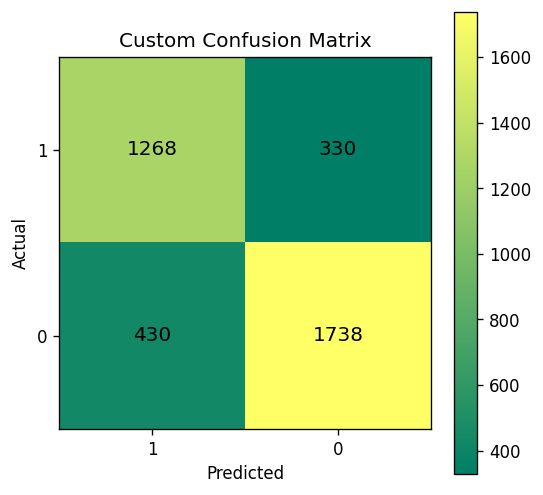

In [77]:
confusion_mat = confusion_matrix(y_test, y_pred_best)

# 绘制自定义混淆矩阵
plt.figure(figsize=(5, 5), dpi=120)
plt.imshow(confusion_mat, cmap='summer')
plt.colorbar()

# 在混淆矩阵中添加文本
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, str(confusion_mat[i, j]), fontsize=12,
                 horizontalalignment='center', verticalalignment='center')

# 设置轴刻度和标签
plt.xticks(np.arange(0, 2), ['1', '0'])  # 对调x轴刻度标签
plt.yticks(np.arange(0, 2), ['1', '0'])  # 对调y轴刻度标签
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Custom Confusion Matrix')
plt.show()

In [78]:
# 7. 計算性能指標
tp = confusion_mat[0, 0]
fn = confusion_mat[0, 1]
fp = confusion_mat[1, 0]
tn = confusion_mat[1, 1]
accuracy = (tp + tn) / (tp + fn + fp + tn) if (tp + fn + fp + tn) != 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

# 8. 輸出結果
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.7982
Sensitivity (Recall): 0.7935
Specificity: 0.8017
Precision: 0.7468
F1-Score: 0.7694


In [88]:
new_data = pd.DataFrame({
    'Name': info_test.iloc[:, 0].values,  # 測試集的前三列資訊
    'cycle': info_test.iloc[:, 1].values,
    'hands': info_test.iloc[:, 3].values,
    'Actual_Label': y_test.values,
    'Predicted_Label': y_pred_best
})

new_data = new_data.sort_values(by='Name')

new_data['Is_Correct'] = new_data['Actual_Label'] == new_data['Predicted_Label']

# 根據 hands 分組，計算正確和錯誤的數量
summary = new_data.groupby(['Name', 'hands'])['Is_Correct'].value_counts().unstack().fillna(0)
summary.columns = ['Incorrect', 'Correct']  # 設定列名
summary = summary.astype(int)  # 將數值轉為整數
summary = summary.reset_index()
# 顯示結果
print("左右手判斷正確與錯誤的數量：")
print(summary)

summary.to_csv('F:\\All data\\Patient_Signal\\a.csv', index=False, encoding='utf-8-sig')
print("已儲存為 a.csv")

左右手判斷正確與錯誤的數量：
    Name  hands  Incorrect  Correct
0   伍黃秀霞   Left          1       33
1   伍黃秀霞  Right          6       73
2    劉正國   Left         13       44
3    劉正國  Right          5       56
4   吳劉碧桃   Left          8       16
..   ...    ...        ...      ...
79  陳高碧緞  Right         16       32
80  馮丁美珠   Left          6       18
81  馮丁美珠  Right          3       15
82  高陳賽金   Left         27       35
83  高陳賽金  Right          6       52

[84 rows x 4 columns]
已儲存為 a.csv


In [80]:
import pandas as pd

# 使用agg來計算每個Label的實際計數
summary = new_data.groupby('Name').agg(
    Actual_0_Count=('Actual_Label', lambda x: 1 if (x == 0).any() else 0),
    Actual_1_Count=('Actual_Label', lambda x: 1 if (x == 1).any() else 0),
    Predicted_0_Raw=('Predicted_Label', lambda x: (x == 0).sum()),
    Predicted_1_Raw=('Predicted_Label', lambda x: (x == 1).sum())
).reset_index()

# 根據多寡決定 Predicted_Label 的值
summary['Predicted_Label'] = summary.apply(
    lambda row: 0 if row['Predicted_0_Raw'] > row['Predicted_1_Raw'] else 1, axis=1
)

# 將 Actual_Label 簡化為單一欄位
summary['Actual_Label'] = summary.apply(
    lambda row: 0 if row['Actual_0_Count'] == 1 else 1, axis=1
)

# 保留只需的欄位
summary = summary[['Name', 'Actual_Label', 'Predicted_Label']]

# 檢視結果
print(summary)

# 儲存結果為新的 CSV 文件
summary.to_csv('F:\\All data\\Patient_Signal\\Summary_PPG.csv', index=False, encoding='utf-8-sig')
print("已儲存為 Summary_PPG.csv")


     Name  Actual_Label  Predicted_Label
0    伍黃秀霞             1                1
1     劉正國             1                1
2    吳劉碧桃             1                1
3   吳水道_前             0                0
4   吳水道_後             1                1
5     吳錫明             1                1
6   吳鑫鴻_前             0                0
7   吳鑫鴻_後             1                1
8   周德和_前             0                0
9   周德和_後             1                1
10    周玉花             1                1
11   張劉鳳英             0                0
12    張林秀             1                1
13    張秋花             0                0
14    張美淑             1                1
15    張葉燕             1                1
16  張金英_前             0                0
17  張金英_後             1                1
18    施陳茸             1                0
19    李太山             1                1
20  李太山_前             0                0
21  李太山_後             1                1
22    李武男             1                1
23    李清龍       

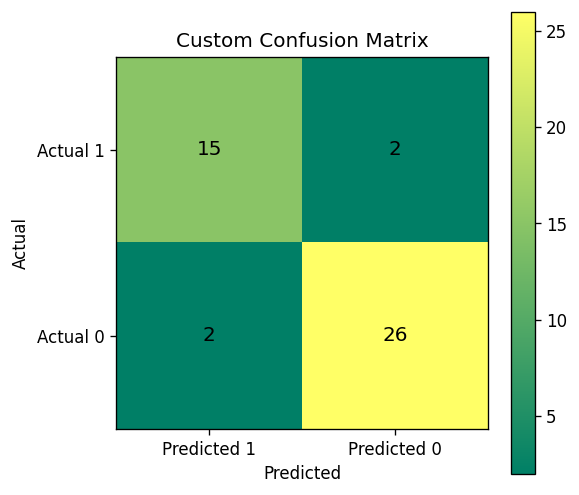

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 假設 conf_matrix 已經是你現有的混淆矩陣結果
conf_matrix = confusion_matrix(summary['Actual_Label'], summary['Predicted_Label'])

# 繪製自定義混淆矩陣
plt.figure(figsize=(5, 5), dpi=120)
plt.imshow(conf_matrix, cmap='summer')
plt.colorbar()

# 在混淆矩陣中添加文本
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), fontsize=12,
                 horizontalalignment='center', verticalalignment='center')

# 設定軸刻度和標籤
plt.xticks(np.arange(0, 2), ['Predicted 1', 'Predicted 0'])  # x軸刻度標籤
plt.yticks(np.arange(0, 2), ['Actual 1', 'Actual 0'])        # y軸刻度標籤
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Custom Confusion Matrix')
plt.show()

In [82]:
# 7. 計算性能指標
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1]
fp = conf_matrix[1, 0]
tn = conf_matrix[1, 1]
accuracy = (tp + tn) / (tp + fn + fp + tn) if (tp + fn + fp + tn) != 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

# 8. 輸出結果
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.9111
Sensitivity (Recall): 0.8824
Specificity: 0.9286
Precision: 0.8824
F1-Score: 0.8824
